<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [3]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

with open ('estados-bruto.xml', 'r', encoding = 'utf8') as nome_arquivo_fonte:
  conteudo = nome_arquivo_fonte.read()


In [4]:
# visualize os resultados
fonte = BeautifulSoup(conteudo, 'xml')

print(fonte.prettify())

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
 <ESTADO>
  <ID>
   1
  </ID>
  <NOME>
   ACRE
  </NOME>
  <IDCAPITAL>
   16
  </IDCAPITAL>
  <SIGLA>
   AC
  </SIGLA>
  <REGIAO>
   NORTE
  </REGIAO>
 </ESTADO>
 <ESTADO>
  <ID>
   2
  </ID>
  <NOME>
   ALAGOAS
  </NOME>
  <IDCAPITAL>
   68
  </IDCAPITAL>
  <SIGLA>
   AL
  </SIGLA>
  <REGIAO>
   NORDESTE
  </REGIAO>
 </ESTADO>
 <ESTADO>
  <ID>
   3
  </ID>
  <NOME>
   AMAPA
  </NOME>
  <IDCAPITAL>
   131
  </IDCAPITAL>
  <SIGLA>
   AP
  </SIGLA>
  <REGIAO>
   NORTE
  </REGIAO>
 </ESTADO>
 <ESTADO>
  <ID>
   4
  </ID>
  <NOME>
   AMAZONAS
  </NOME>
  <IDCAPITAL>
   178
  </IDCAPITAL>
  <SIGLA>
   AM
  </SIGLA>
  <REGIAO>
   NORTE
  </REGIAO>
 </ESTADO>
 <ESTADO>
  <ID>
   5
  </ID>
  <NOME>
   BAHIA
  </NOME>
  <IDCAPITAL>
   536
  </IDCAPITAL>
  <SIGLA>
   BA
  </SIGLA>
  <REGIAO>
   NORDESTE
  </REGIAO>
 </ESTADO>
 <ESTADO>
  <ID>
   6
  </ID>
  <NOME>
   CEARA
  </NOME>
  <IDCAPITAL>
   676
  </IDCAPITAL>
  <SIGLA>
   CE
  </SIGLA>
  

In [5]:
# manipule os dados
#Extrair Estado, sigla e Região
estados = []

for linha in fonte.find_all('ESTADO'):
  nome = linha.find('NOME').get_text()
  sigla = linha.find('SIGLA').get_text()
  regiao = linha.find('REGIAO').get_text()

  estados.append([nome, sigla, regiao])

print(estados)

[['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SAO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [6]:
import csv

header = ['estado', 'sigla', 'regiao'] #Cabeçalho

with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerow(header)
  escritor_csv.writerows(estados)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [7]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte_df = pd.read_csv(NOME_ARQUIVO_FONTE)

In [8]:
# visualize os resultados

# continue o codigo aqui.df 
fonte_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [9]:
# manipule os dados
# continue o codigo aqui
dados_desejados_df = fonte_df[fonte_df['Censo'] == 2010][['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

dados_desejados_df



,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [10]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui
import csv
header = ['estado','cidade','populacao','pib','pib_percapita'] #Cabeçalho

with open(file='./cidades-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  dados_desejados_df.to_csv('cidades-limpo.csv', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [11]:
# solução do exercício 1.3
#Lendo os df
estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=',')
     
# Unificando os dataframes
brasil_df = pd.merge(left=estados_df, right=cidades_df, left_on='estado', right_on='UF', how='inner')

# Eliminando uma das colunas resultantes
brasil_df.drop(columns=['UF'], inplace=True)
brasil_df

#Salvar em arquivo csv
brasil_df.to_csv('brasil.cvs', index= True)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [12]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv', sep= ';')
brasil_df

,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
3205,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
3206,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
3207,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
3208,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [13]:
# Classificar o DataFrame pelo tamanho da população em ordem decrescente

cidades_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending=False).head(n=10)

# Exibir o resultado
print (cidades_populosas_df[['nome', 'Pop_est_2009']])

                 nome  Pop_est_2009
1096   Rio de Janeiro       6186710
230          Salvador       2998056
602          Brasília       2606885
3102   Belo Horizonte       2452617
126            Manaus       1738641
1019           Recife       1561659
1423     Porto Alegre       1436123
1117      São Gonçalo        991382
105            Maceió        936314
1153  Duque de Caxias        872762


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [14]:
menor_pib_nordeste_df = brasil_df[brasil_df['regiao'] == 'NORDESTE'].sort_values('PIB_percapita', ascending=True).head(n=5)

menor_pib_nordeste_df

,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita
548,BAHIA,BA,NORDESTE,Caetanos,30036.105469,12307,2440.570068
555,BAHIA,BA,NORDESTE,Novo Triunfo,36864.132812,14763,2497.060059
446,BAHIA,BA,NORDESTE,Matina,33801.074219,13245,2551.989990
57,ALAGOAS,AL,NORDESTE,Traipu,68499.687500,25854,2649.479980
397,BAHIA,BA,NORDESTE,Mansidão,32635.740234,12244,2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [15]:
maior_sp_df = brasil_df[brasil_df['estado'] == 'SAO PAULO'].sort_values('PIB', ascending=False).head(n=15)
maior_sp_df


,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita


 - Qual é o PIB do estado de Santa Catarina?

In [16]:
pib_sc_df= (brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA'])
print(pib_sc_df[['estado','PIB']])


              estado            PIB
1850  SANTA CATARINA  364577.812500
1851  SANTA CATARINA   50867.898438
1852  SANTA CATARINA  128883.093750
1853  SANTA CATARINA  158156.390625
1854  SANTA CATARINA   78940.250000
...              ...            ...
2138  SANTA CATARINA   82298.976562
2139  SANTA CATARINA   95864.148438
2140  SANTA CATARINA  193337.234375
2141  SANTA CATARINA  128651.765625
2142  SANTA CATARINA  187628.906250

[293 rows x 2 columns]


In [17]:
#SOMA DOS PIB
pib_sc_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['PIB'].agg('sum')

pib_sc_df

129806256.75195317

 - Qual é o população da região sul?

In [18]:
#opulacao_sul_df= brasil_df.sort_values(by=['Pop_est_2009']== 'SUL')

populacao_sul_df =brasil_df[brasil_df['regiao'] == 'SUL']['Pop_est_2009'].agg('sum')

pib_sc_df

129806256.75195317

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [19]:

pibcapita_ms_df = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['PIB_percapita'].agg('mean')

pibcapita_ms_df


14458.896859975644

 - Qual é a população do Brasil?

In [20]:

populacao_sul_df =brasil_df[brasil_df['regiao'] == 'BRASIL']['Pop_est_2009'].agg('sum')

pib_sc_df

129806256.75195317

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [21]:
pip MatplotLib


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "MatplotLib"



In [22]:

menos_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending=True).head(n=10)

menos_populosas_df

,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita
2852,MINAS GERAIS,MG,SUDESTE,Serra da Saudade,10433.846680,890,11723.419922
774,MATO GROSSO,MT,CENTRO-OESTE,Araguainha,11522.663086,1115,10334.230469
2219,TOCANTINS,TO,NORTE,Oliveira de Fátima,11591.949219,1129,10267.450195
2362,MINAS GERAIS,MG,SUDESTE,Cedro do Abaeté,10221.856445,1221,8371.709961
2253,TOCANTINS,TO,NORTE,Chapada de Areia,11322.538086,1273,8894.370117
1567,RIO GRANDE DO SUL,RS,SUL,André da Rocha,42260.593750,1276,33119.589844
2230,TOCANTINS,TO,NORTE,Crixás do Tocantins,20361.164062,1289,15796.089844
2087,SANTA CATARINA,SC,SUL,Santiago do Sul,20742.195312,1443,14374.360352
814,MATO GROSSO,MT,CENTRO-OESTE,Serra Nova Dourada,15962.533203,1447,11031.469727
1343,RIO GRANDE DO SUL,RS,SUL,Engenho Velho,24098.886719,1467,16427.330078


Text(0.5, 1.0, '10 Cidades Menos Populosas do Brasil')

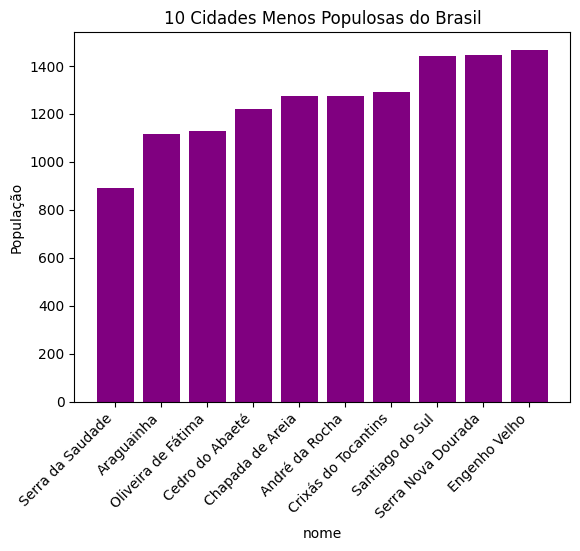

In [23]:
# código para gerar a visualização

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(menos_populosas_df['nome'], menos_populosas_df['Pop_est_2009'], color='purple')

plt.xticks(rotation=45, ha='right')

ax.set_xlabel('nome')
ax.set_ylabel('População')
ax.set_title('10 Cidades Menos Populosas do Brasil')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [24]:
# Agrupar o DataFrame pelo nome da região e somar a população de cada região
regiao_df = brasil_df.groupby('regiao')['Pop_est_2009'].sum().reset_index()
# Exibir o resultado
print(regiao_df)


         regiao  Pop_est_2009
0  CENTRO-OESTE       7847630
1      NORDESTE      31675655
2         NORTE       5798051
3       SUDESTE      39531293
4           SUL      17032871


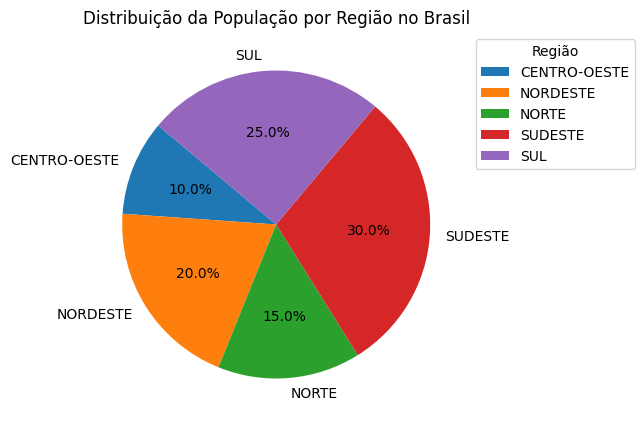

In [29]:
import matplotlib.pyplot as plt

# Definindo os dados
regiao_df = {
    'Pop_est_2009': [10, 20, 15, 30, 25],  # Exemplo de dados
}

# Definindo as cores e as regiões
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
regioes = ['CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'] #Variavel da legenda

# Criando o gráfico de pizza com as cores e as regiões definidas
plt.figure(figsize=(5, 5))
plt.pie(regiao_df['Pop_est_2009'], labels=regioes, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição da População por Região no Brasil')

# Ajustando a legenda para incluir descrição das regiões
plt.legend(title='Região', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrando o gráfico
plt.show()
